### *NAME: VEERA PAVAN KUMAR SEERAPU*
### *ID: 23285281*
### *MSc Data Analytics*
### *National College of Ireland*

#### *Import libraries*

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#### *Loading the dataset*

In [29]:
df = pd.read_csv("./hospitaldata.csv")

### *Data Exploration*
#### *Displaying the first few rows of the dataset*

In [30]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Unknown,_Other,Referral,1,Other,...,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),Unknown,Home,Emergency,3,Other,...,No,No,Up,No,No,No,No,Yes,Yes,After30Days
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,2,Other,...,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,[30-40),Unknown,Home,Emergency,2,Other,...,No,No,Up,No,No,No,No,Yes,Yes,No
4,16680,42519267,Caucasian,Male,[40-50),Unknown,Home,Emergency,1,Other,...,No,No,Steady,No,No,No,No,Yes,Yes,No


#### *Distribution of Readmission Status*

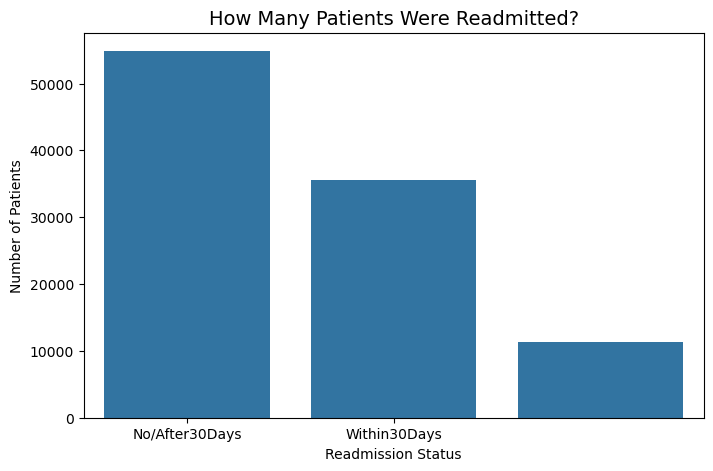

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='readmitted', data=df)
plt.title("How Many Patients Were Readmitted?", fontsize=14)
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")
plt.xticks([0,1], ['No/After30Days', 'Within30Days'])
plt.show()

#### *Understanding Dataset Structure*

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   weight                    101763 non-null  object
 6   discharge_disposition_id  101763 non-null  object
 7   admission_source_id       101763 non-null  object
 8   time_in_hospital          101763 non-null  int64 
 9   medical_specialty         101763 non-null  object
 10  num_lab_procedures        101763 non-null  int64 
 11  num_procedures            101763 non-null  int64 
 12  num_medications           101763 non-null  int64 
 13  number_outpatient         101763 non-null  int64 
 14  numb

#### *Statistical Summary of Numerical Features*

In [33]:
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017630e+05,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,1.652008e+08,5.432965e+07,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649
std,1.026410e+08,3.869658e+07,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.495975e+07,2.341296e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523883e+08,4.550049e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302698e+08,8.754571e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### *Correlation Heatmap*

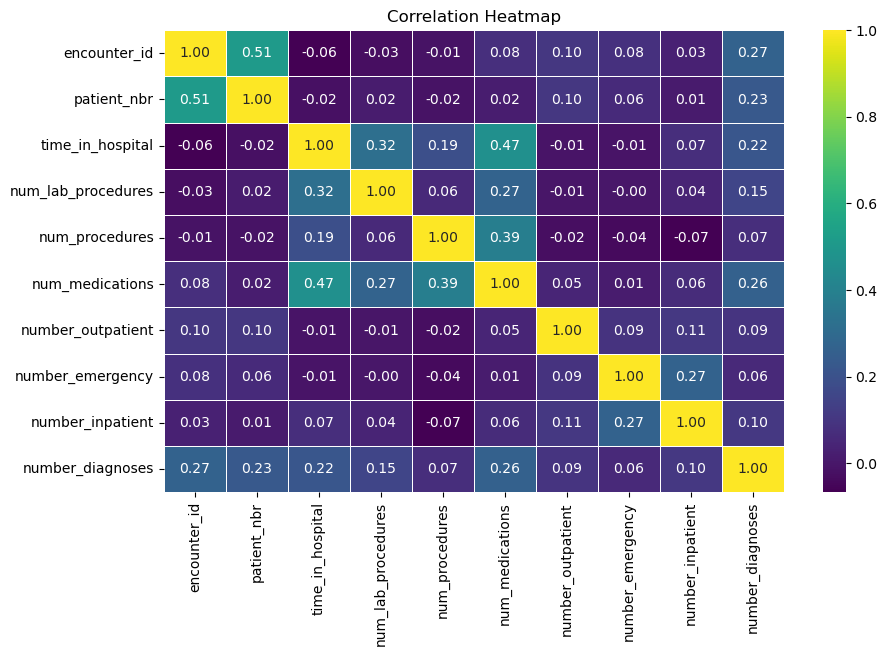

In [34]:
numeric_data = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### *Visualizing Categorical Variables*

C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\3012749748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\3012749748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\3012749748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


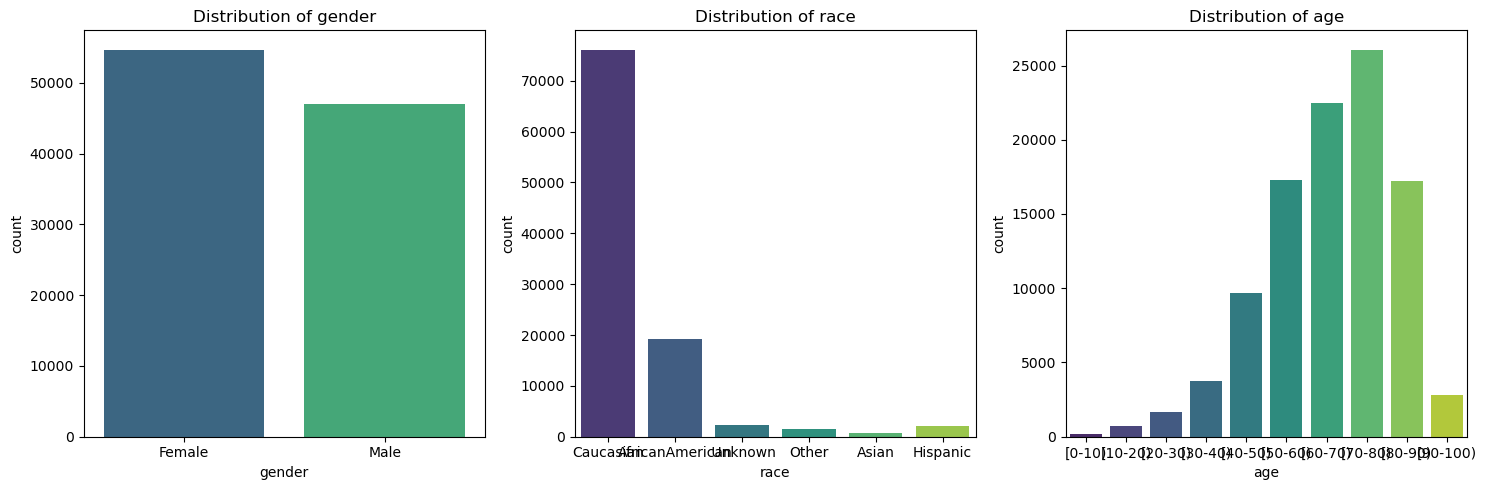

In [35]:
categorical_cols = ["gender", "race", "age"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### *Data Cleaning*
#### *Checking for Missing Values*

In [36]:
missingvalues = pd.DataFrame(df.isnull().sum(axis=0), columns=['number_of_missing_values'])
missingvalues['feature'] = missingvalues.index
missingvalues = missingvalues[['feature','number_of_missing_values']].reset_index(drop=True)
missingvalues[missingvalues.number_of_missing_values > 0]

,feature,number_of_missing_values


In [37]:
df['service_utilization'] = df ['number_outpatient'] + df['number_emergency'] + df['number_inpatient'] 

In [38]:
for col in df.columns:
    if df[col].dtype == object:
        print(col, df[col][df[col] == "?"].count())
print('gender',df['gender'][df['gender']=='Unknown/Invalid'].count())

race 0
gender 0
age 0
weight 0
discharge_disposition_id 0
admission_source_id 0
medical_specialty 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide_metformin 0
glipizide_metformin 0
glimepiride_pioglitazone 0
metformin_pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


In [39]:
print('>30 readmission', df['readmitted'][df['readmitted'] == 'After30Days'].count())
print('<30 readmission', df['readmitted'][df['readmitted'] == 'Within30Days'].count())
print('No readmission', df['readmitted'][df['readmitted'] == 'No'].count())

>30 readmission 35545
<30 readmission 11357
No readmission 54861


In [40]:
drop_Idx = set(df[(df['diag_1'] == "?")&(df['diag_2'] == "?")&(df['diag_3'] == "?")].index)
new_Idx = list(set(df.index)-set(drop_Idx))
df = df.iloc[new_Idx]

#### *Dropping columns with to many missing values*

In [41]:
df = df.drop(['weight'], axis=1)

#### *Remove the coluns having same value in each row*

In [42]:
df = df.drop(['citoglipton', 'examide','acetohexamide'], axis=1)

In [43]:
df['gender'] = df['gender'].replace('Male',1)
df['gender'] = df['gender'].replace('Female',0)

df['diabetesMed'] = df['diabetesMed'].str.strip().str.lower().replace({'yes': 1, 'no': 0})
df['change'] = df['change'].str.strip().str.lower().replace({'yes': 1, 'no': 0})
df['readmitted'] = df['readmitted'].str.strip().str.lower().replace({'after30days': 0, 'within30days': 1, 'no':0})

for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')',i+1)

C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\1876239600.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female',0)
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\1876239600.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed'] = df['diabetesMed'].str.strip().str.lower().replace({'yes': 1, 'no': 0})
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\1876239600.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

#### *Age Distribution*

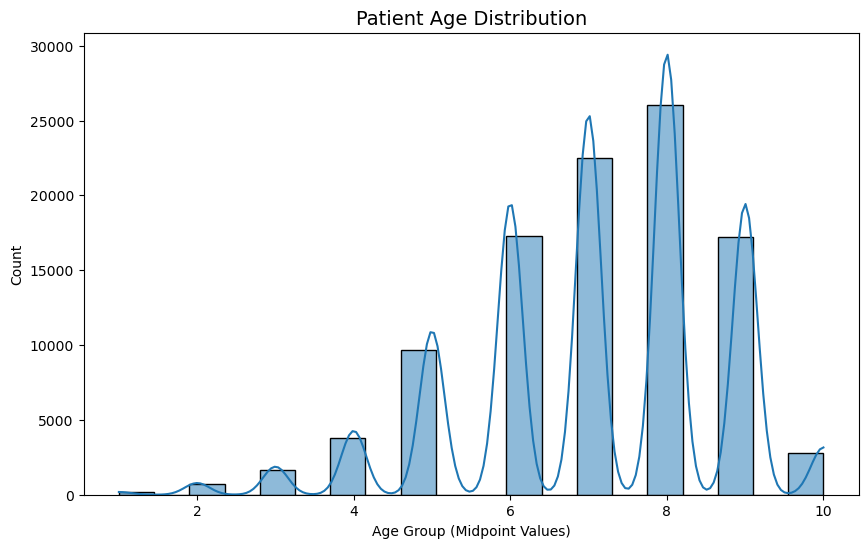

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Patient Age Distribution", fontsize=14)
plt.xlabel("Age Group (Midpoint Values)")
plt.ylabel("Count")
plt.show()

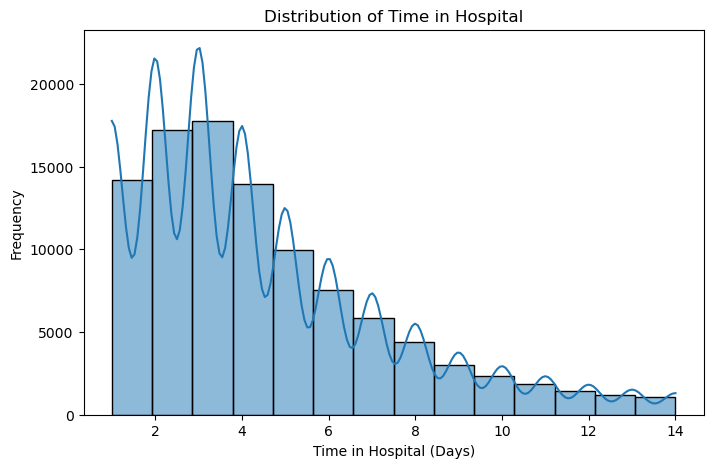

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['time_in_hospital'], bins=14, kde=True)
plt.title("Distribution of Time in Hospital")
plt.xlabel("Time in Hospital (Days)")
plt.ylabel("Frequency")
plt.show()

#### *So the dataset consists 23 features for 23 drugs indicates in each one whether the change in the specific medication occurred or not in the current month. medication state on diabetes upon admission has been shown on previous research to be associated with hospital stay of the patient, declared that a new feature, which is a lower admission rate so we counted, how many changes were made for each patient. The reason here was to simplify the model at the same time possibly discover a relationship with number of chnages irrelevant of which drug was changed*

In [46]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone']

for col in keys:
    df[col] = df[col].astype(str).str.strip().str.lower()

for col in keys:
    print(f"Unique values in {col}: {df[col].unique()}")

replacement_dict = {'no': 0, 'steady': 1, 'up': 1, 'down': 1}
for col in keys:
    df[col] = df[col].replace(replacement_dict)

df['numchange'] = 0
for col in keys:
    df['numchange'] += df[col].apply(lambda x: 0 if x == 0 else 1)

print(df[keys + ['numchange']].head())

Unique values in metformin: ['no' 'steady' 'up' 'down']
Unique values in repaglinide: ['no' 'up' 'steady' 'down']
Unique values in nateglinide: ['no' 'steady' 'down' 'up']
Unique values in chlorpropamide: ['no' 'steady' 'down' 'up']
Unique values in glimepiride: ['no' 'steady' 'down' 'up']
Unique values in glipizide: ['no' 'steady' 'up' 'down']
Unique values in glyburide: ['no' 'steady' 'up' 'down']
Unique values in tolbutamide: ['no' 'steady']
Unique values in pioglitazone: ['no' 'steady' 'up' 'down']
Unique values in rosiglitazone: ['no' 'steady' 'up' 'down']
Unique values in acarbose: ['no' 'steady' 'up' 'down']
Unique values in miglitol: ['no' 'steady' 'down' 'up']
Unique values in troglitazone: ['no' 'steady']
Unique values in tolazamide: ['no' 'steady' 'up']
Unique values in insulin: ['no' 'up' 'steady' 'down']
Unique values in glyburide_metformin: ['no' 'steady' 'down' 'up']
Unique values in glipizide_metformin: ['no' 'steady']
Unique values in glimepiride_pioglitazone: ['no' 's

C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\73131024.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replacement_dict)


   metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
0          0            0            0               0            0   
1          0            0            0               0            0   
2          0            0            0               0            0   
3          0            0            0               0            0   
4          0            0            0               0            0   

   glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  \
0          0          0            0             0              0         0   
1          0          0            0             0              0         0   
2          1          0            0             0              0         0   
3          0          0            0             0              0         0   
4          1          0            0             0              0         0   

   miglitol  troglitazone  tolazamide  insulin  glyburide_metformin  \
0         0             0  

In [47]:
df['numchange'].value_counts()

numchange
1    47316
0    23401
2    21870
3     7777
4     1335
5       58
6        5
Name: count, dtype: int64

#### *Medication Changes*

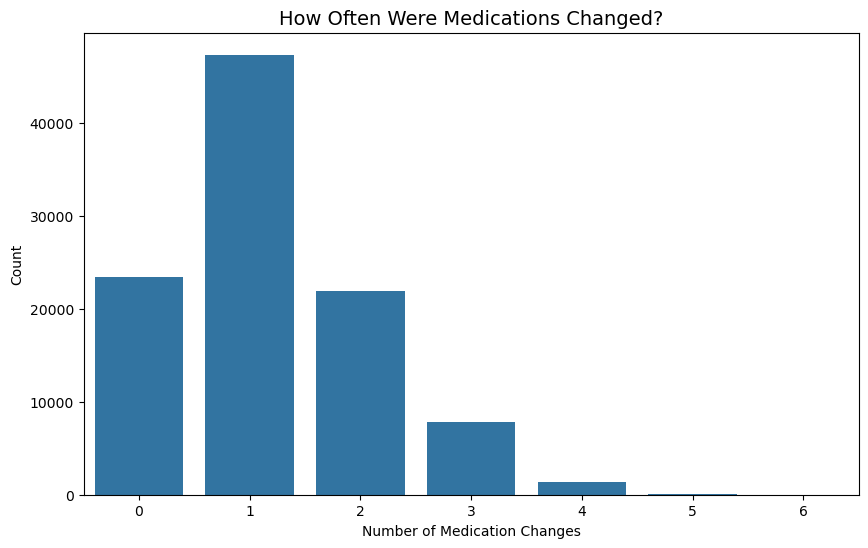

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='numchange', data=df)
plt.title("How Often Were Medications Changed?", fontsize=14)
plt.xlabel("Number of Medication Changes")
plt.ylabel("Count")
plt.show()

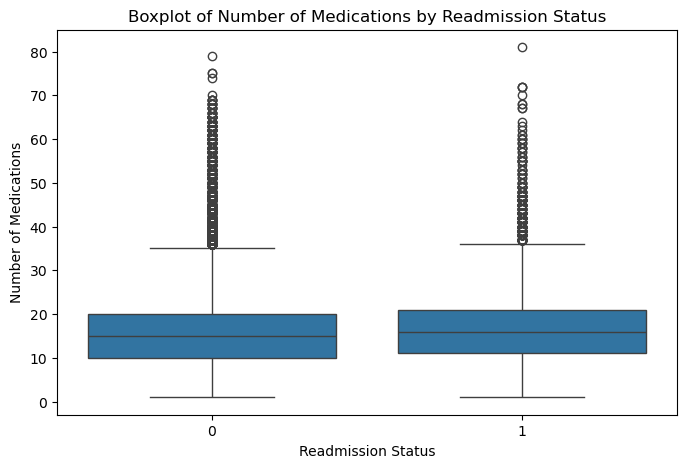

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x='readmitted', y='num_medications', data=df)
plt.title("Boxplot of Number of Medications by Readmission Status")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Medications")
plt.show()

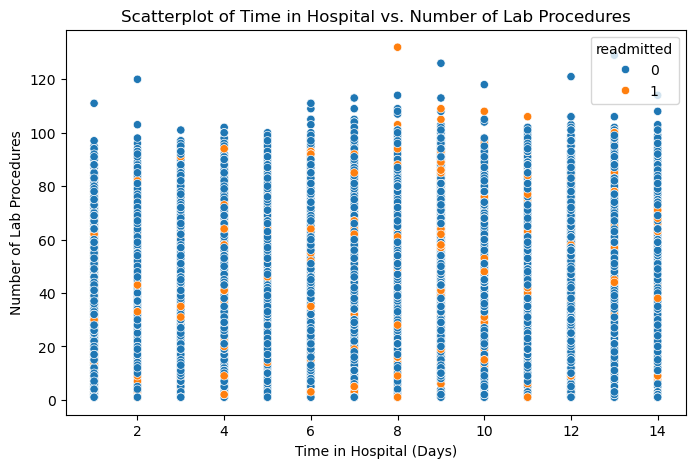

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='time_in_hospital', y='num_lab_procedures', hue='readmitted', data=df)
plt.title("Scatterplot of Time in Hospital vs. Number of Lab Procedures")
plt.xlabel("Time in Hospital (Days)")
plt.ylabel("Number of Lab Procedures")
plt.show()

In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [53]:
for col in keys:
    df[col] = df[col].replace('No',0)
    df[col] = df[col].replace('Steady',1)
    df[col] = df[col].replace('Up',1)
    df[col] = df[col].replace('Down',1)

"""
reduced a1c result and max_glu_serum categeories of normal, abnormal, not tested
>7 & >8 = abnormal
Norm = Normal
None = Not Tested

> 200 & >300 abnormal
Norm normal
None Not tested
"""

# Define replacement dictionaries
a1c_replacement = {
    '>7': 1,
    '>8': 1,
    'norm': 0,
    'none': -99
}

max_glu_replacement = {
    '>200': 1,
    '>300': 1,
    'norm': 0,
    'none': -99
}

# Strip leading/trailing whitespace and convert to lowercase

df['A1Cresult'] = df['A1Cresult'].astype(str).str.strip().str.lower()
df['max_glu_serum'] = df['max_glu_serum'].astype(str).str.strip().str.lower()

# Replace values using the dictionaries

df['A1Cresult'] = df['A1Cresult'].replace(a1c_replacement)
df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_replacement)

# Print unique values to verify replacements

print("Unique values in A1Cresult after replacement:", df['A1Cresult'].unique())
print("Unique values in max_glu_serum after replacement:", df['max_glu_serum'].unique())

Unique values in A1Cresult after replacement: [-99   1   0]
Unique values in max_glu_serum after replacement: [-99   1   0]


C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\1622498131.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult'] = df['A1Cresult'].replace(a1c_replacement)
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\1622498131.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_replacement)


#### *In this part of code we have displayed the total number of mediations used by patient, that means,  we have created another feature that is counting of medications used in an encounter and now mentions it is key list which we created containing the list of 23 drugs.*

In [54]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]

df['nummed'].value_counts()

nummed
1    47316
0    23401
2    21870
3     7777
4     1335
5       58
6        5
Name: count, dtype: int64

In [55]:
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

#### *since all these diagnosis had 700-900 unique ICD codes it is extremely difficult to include them in model and interpret meaningfully, therefore we have collapsed these diagnosis codes into 9 categories in an almost similar fashion to that done in original publication using this dataset these 9 categories include circulatory, respiratory, digestive, diabetics, injury, muscular, skeletal, genitourinary, neoplasm and several others also we have decided to use only primary diagnosis in our model since we are mapping the disease codes to certain category names.*

In [56]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [57]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [58]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0

for index, row in df.iterrows():
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0

for index, row in df.iterrows():
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0


for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif (row['level2_diag1'] >= 240 and row['level2_diag1'] < 280) and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0


for index, row in df.iterrows():
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif (row['level2_diag1'] >= 240 and row['level2_diag1'] < 280) and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0


for index, row in df.iterrows():
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif (row['level2_diag1'] >= 240 and row['level2_diag1'] < 280) and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

In [59]:
df[['diag_1','level1_diag1']].head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
diag_1,250.83,276,648,8,197,414,414,428,398,434,250.7,157,428,428,518
level1_diag1,4.0,0.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,4.0,8.0,1.0,1.0,2.0


In [60]:
df.shape

(101762, 52)

In [61]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                        int64
age                           int64
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
glipizide                     int64
glyburide                   

In [62]:
i = ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone','change', 'diabetesMed','level1_diag1', 'level2_diag1', 'level1_diag2', 'level2_diag2',
     'level1_diag3', 'level2_diag3']
df[i] = df[i].astype('object')

In [63]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
glipizide                   object
glyburide                   object
tolbutamide         

In [64]:
L1 = np.random.randint(1,10,20)
L2 = np.random.randint(1,20,20)

dataframe = pd.DataFrame()
dataframe['L1'] = L1
dataframe['L2'] = L2

dataframe.corr()

,L1,L2
L1,1.00000,-0.08357
L2,-0.08357,1.00000


In [65]:
scalar = MinMaxScaler()
dataframe = pd.DataFrame(scalar.fit_transform(dataframe), columns=['L1','L2'])
dataframe.corr()

,L1,L2
L1,1.00000,-0.08357
L2,-0.08357,1.00000


In [66]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())

age_dict = {1:5,2:15,3:25,4:35,5:45,6:55,7:65,8:75,9:85,10:95}
df['age'] = df.age.map(age_dict)

age
8     26066
7     22481
6     17256
9     17197
5      9685
4      3775
10     2793
3      1657
2       691
1       161
Name: count, dtype: int64


In [67]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_medications',
 'age',
 'number_emergency',
 'service_utilization',
 'num_lab_procedures',
 'time_in_hospital',
 'number_inpatient',
 'number_outpatient',
 'numchange',
 'number_diagnoses',
 'num_procedures',
 'nummed']

#### *Removing skewness and kurtosis using log transformation*

In [68]:
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) > 2) & (abs(kurtval) > 2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0]) / len(df) <= 0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
        
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
        
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')
    
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [69]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_medications,1.326703,3.468184,8.127626,No,NA,1.326703,3.468184,8.127626
1,age,-0.630506,0.281272,15.941100,No,NA,-0.630506,0.281272,15.941100
2,number_emergency,22.855169,1191.643252,0.930490,Yes,log1p,3.653563,16.202000,0.314970
3,service_utilization,5.315126,67.178320,2.291817,Yes,log1p,1.114450,0.535796,0.662530
4,num_lab_procedures,-0.236512,-0.245007,19.673874,No,NA,-0.236512,-0.245007,19.673874
5,time_in_hospital,1.134056,0.850395,2.985096,No,NA,1.134056,0.850395,2.985096
6,number_inpatient,3.614080,20.718682,1.262883,Yes,log1p,1.441938,1.375114,0.511107
7,number_outpatient,8.832796,147.902408,1.267288,Yes,log1p,2.739668,7.851558,0.429353
8,numchange,0.681512,0.292346,0.920165,No,NA,0.681512,0.292346,0.920165
9,number_diagnoses,-0.876833,-0.078803,1.933572,No,NA,-0.876833,-0.078803,1.933572


In [70]:
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [71]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency', 'service_utilization'], axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,level1_diag1,level2_diag1,level1_diag2,level2_diag2,level1_diag3,level2_diag3,number_emergency_log1p,service_utilization_log1p,number_inpatient_log1p,number_outpatient_log1p
0,2278392,8222157,Caucasian,0,5,_Other,Referral,1,Other,41,...,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,149190,55629189,Caucasian,0,15,Home,Emergency,3,Other,59,...,0.0,20.0,4.0,14.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,64410,86047875,AfricanAmerican,0,25,Home,Emergency,2,Other,11,...,0.0,0.0,4.0,14.0,0.0,0.0,0.0,1.386294,0.693147,1.098612
3,500364,82442376,Caucasian,1,35,Home,Emergency,2,Other,44,...,0.0,0.0,4.0,14.0,1.0,2.0,0.0,0.000000,0.000000,0.000000
4,16680,42519267,Caucasian,1,45,Home,Emergency,1,Other,51,...,8.0,19.0,8.0,19.0,4.0,14.0,0.0,0.000000,0.000000,0.000000


In [72]:
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [73]:
numerics

['service_utilization_log1p',
 'num_medications',
 'age',
 'num_lab_procedures',
 'time_in_hospital',
 'number_outpatient_log1p',
 'number_inpatient_log1p',
 'numchange',
 'number_diagnoses',
 'num_procedures',
 'nummed',
 'number_emergency_log1p']

In [74]:
df['diabetesMed']

0         0
1         1
2         1
3         1
4         1
         ..
101758    1
101759    1
101760    1
101761    1
101762    0
Name: diabetesMed, Length: 101762, dtype: object

In [75]:
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone']

df[i] = df[i].astype('int64')
df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                            int64
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
medical_specialty             object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
pioglitazone                   int64
r

In [76]:
df.drop(['diag_1','diag_2','diag_3','level2_diag1', 'level1_diag2','level2_diag2','level1_diag3','level2_diag3'],axis=1, inplace=True)

In [77]:
interactionterms = [
    ('num_medications', 'time_in_hospital'),
    ('num_medications', 'num_procedures'),
    ('time_in_hospital', 'num_lab_procedures'),
    ('num_medications', 'num_lab_procedures'),
    ('num_medications', 'number_diagnoses'),
    ('age', 'number_diagnoses'),
    ('change', 'num_medications'),
    ('number_diagnoses', 'time_in_hospital'),
    ('num_medications', 'numchange')
]

for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [78]:
df

,encounter_id,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,number_outpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
0,2278392,8222157,Caucasian,0,5,_Other,Referral,1,Other,41,...,0.000000,1,0,41,41,1,5,0,1,0
1,149190,55629189,Caucasian,0,15,Home,Emergency,3,Other,59,...,0.000000,54,0,177,1062,162,135,18,27,18
2,64410,86047875,AfricanAmerican,0,25,Home,Emergency,2,Other,11,...,1.098612,26,65,22,143,78,150,0,12,13
3,500364,82442376,Caucasian,1,35,Home,Emergency,2,Other,44,...,0.000000,32,16,88,704,112,245,16,14,16
4,16680,42519267,Caucasian,1,45,Home,Emergency,1,Other,51,...,0.000000,8,0,51,408,40,225,8,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,AfricanAmerican,1,75,_Other,Emergency,3,Other,51,...,0.000000,48,0,153,816,144,675,16,27,32
101759,443847782,74694222,AfricanAmerican,0,85,_Other,Other,5,Other,33,...,0.000000,90,54,165,594,162,765,0,45,18
101760,443854148,41088789,Caucasian,1,75,Home,Emergency,1,Other,53,...,0.693147,9,0,53,477,117,975,9,13,18
101761,443857166,31693671,Caucasian,0,85,_Other,Emergency,10,Other,45,...,0.000000,210,42,450,945,189,765,21,90,63


#### *standardize function*

In [79]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [80]:
df[numerics] = standardize(df[numerics])
import scipy as sp
df = df[(np.abs(sp.stats.zscore(df[numerics])) < 3).all(axis=1)]

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['race', 'discharge_disposition_id', 'admission_source_id','medical_specialty']

# Apply label encoding to each column

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\986646845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\986646845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\986646845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

#### *Confusion Matrix*

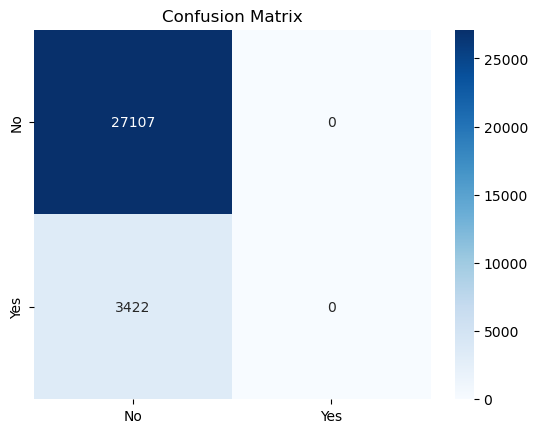

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.show()

#### *Correlation Heatmap*

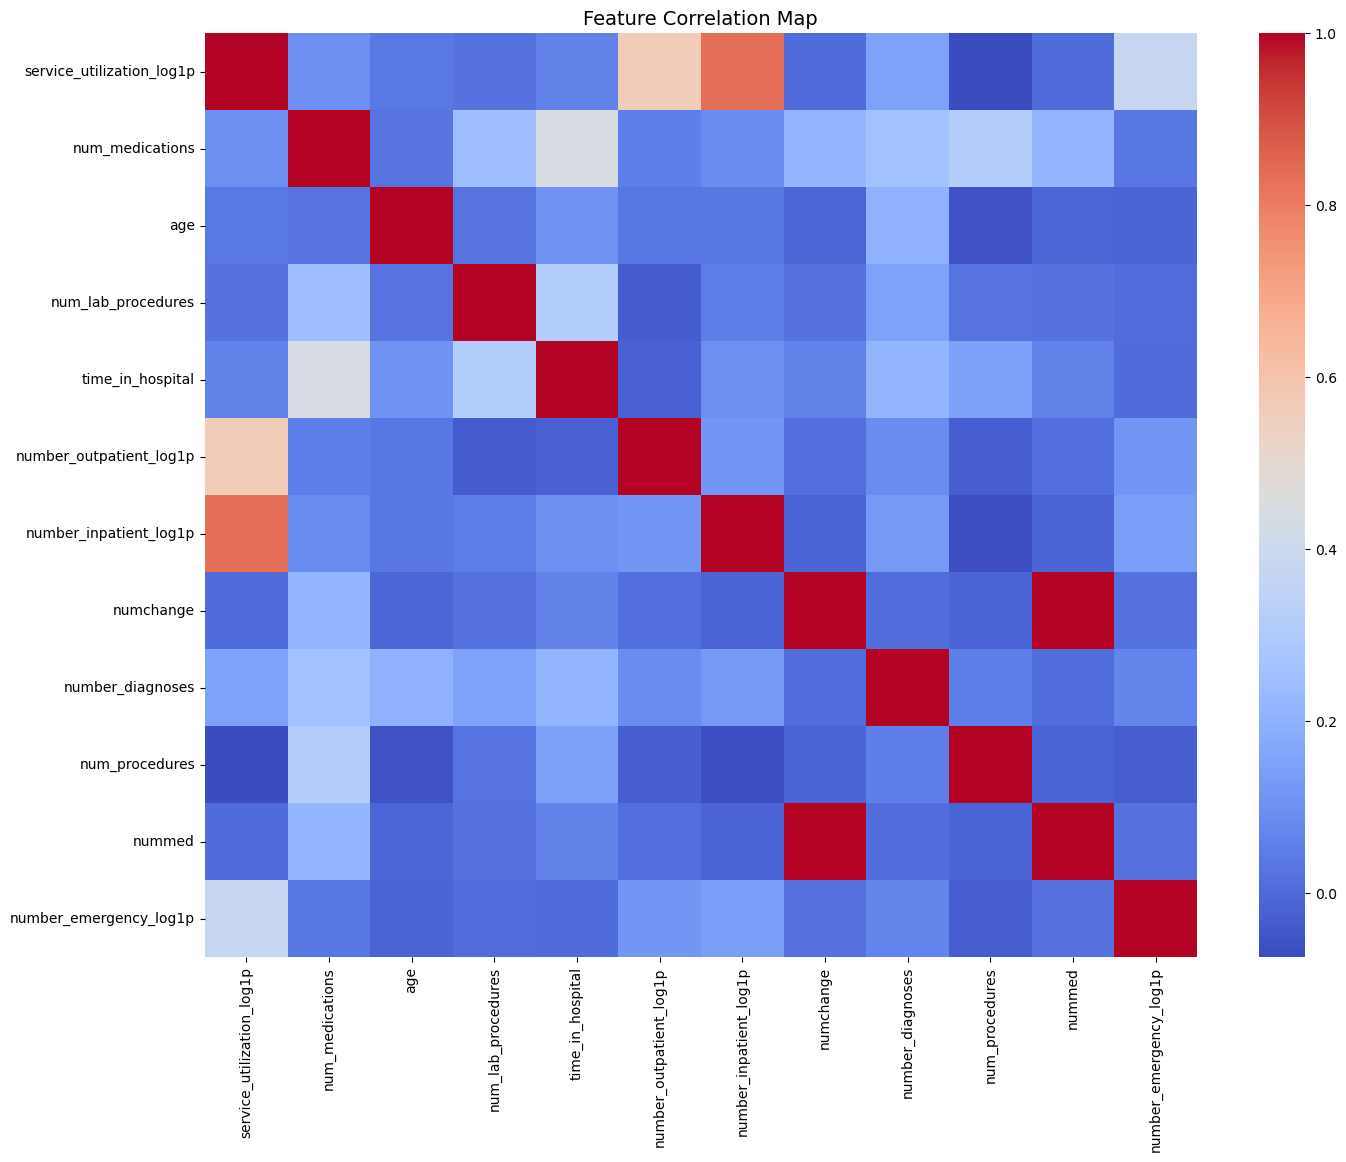

In [84]:
plt.figure(figsize=(16,12))
corr_matrix = df[numerics].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Map", fontsize=14)
plt.show()

##### *Confusion Matrix*

In [85]:
from matplotlib.colors import ListedColormap

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

C:\Users\vpava\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\vpava\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted,numchange,nummed,level1_diag1,number_emergency_log1p,service_utilization_log1p,number_inpatient_log1p,number_outpatient_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,age|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
race,1.000000,0.057095,0.114744,0.038482,0.020238,-0.015293,-0.077195,-0.024797,0.027977,0.028393,0.084171,0.062079,-0.016405,0.014192,0.025489,-0.004012,0.008355,0.011556,0.021109,0.014020,0.002893,0.021041,0.005979,0.013261,0.002859,0.002458,0.000506,-0.044529,0.001957,0.004707,0.001419,nan,0.009949,-0.006512,0.003621,0.008714,0.008714,0.005342,-0.007419,0.024147,-0.001827,0.055834,0.002515,0.024214,-0.016719,0.007911,0.054504,0.128242,0.018258,0.012667,0.024107
gender,0.057095,1.000000,-0.061580,-0.066886,0.016242,-0.035404,-0.028113,-0.006228,0.058532,-0.040843,-0.003792,-0.003171,0.018098,-0.004082,-0.008938,-0.007692,0.004468,-0.001461,0.024704,0.031173,0.001170,0.002997,0.007853,0.008190,0.004580,0.006203,0.007545,-0.004654,0.002505,0.005851,-0.003083,nan,0.008965,0.014401,-0.003113,0.017706,0.017706,-0.017822,-0.021908,-0.015637,-0.009181,-0.006827,-0.035640,0.036880,-0.023479,-0.023816,-0.033909,-0.041402,-0.006930,-0.031523,-0.004434
age,0.114744,-0.061580,1.000000,0.287825,-0.065412,0.106940,0.022091,0.023335,-0.056399,0.024608,0.205548,0.038479,-0.104359,-0.074891,0.049223,0.017422,0.013303,0.036254,0.048856,0.071361,0.011803,0.005232,-0.002319,0.010112,0.009963,-0.001932,0.004182,-0.064446,-0.003844,0.000058,-0.000382,nan,-0.036318,-0.013966,0.028700,-0.008111,-0.008111,-0.010189,-0.015350,0.038078,0.031832,0.033665,0.068374,-0.042714,0.081608,0.028084,0.089891,0.736195,-0.013985,0.147801,0.009760
discharge_disposition_id,0.038482,-0.066886,0.287825,1.000000,-0.080635,0.278632,-0.057115,0.065459,-0.048175,0.169246,0.167792,0.089178,-0.031962,-0.036018,0.018795,-0.007798,0.007443,-0.020150,-0.003824,0.023804,0.011777,-0.016921,-0.009328,0.002826,0.009412,0.007016,0.002359,0.004519,-0.007349,0.003219,-0.002726,nan,0.016326,-0.008385,0.076484,-0.017086,-0.017086,0.065827,0.021447,0.093478,0.097664,0.033910,0.250392,0.018252,0.215473,0.140040,0.201912,0.292641,0.072681,0.296594,0.063154
admission_source_id,0.020238,0.016242,-0.065412,-0.080635,1.000000,-0.046953,-0.124370,-0.102118,0.112478,0.064726,-0.035843,-0.304864,-0.020696,0.044641,0.001302,0.015742,-0.001125,0.017868,-0.008568,-0.010155,-0.004255,0.014031,0.012644,0.003556,-0.005578,-0.001571,-0.001236,-0.016313,0.024133,0.001703,-0.000907,nan,0.015873,0.000700,0.000678,0.019750,0.019750,0.119580,-0.040129,-0.020009,-0.026504,0.021161,-0.009437,0.092572,-0.064943,-0.022985,0.026933,-0.065762,0.036103,-0.045962,0.048592
time_in_hospital,-0.015293,-0.035404,0.106940,0.278632,-0.046953,1.000000,0.016950,0.308891,0.146916,0.441014,0.213252,0.018702,0.066743,-0.018096,0.031992,0.003463,0.000729,0.009057,0.010213,0.019155,0.003951,-0.004665,-0.002574,0.001526,0.003059,0.004289,-0.003511,0.096161,-0.003195,-0.001315,-0.002659,nan,0.098039,0.057191,0.048518,0.062636,0.062636,0.015377,0.001411,0.061242,0.094107,-0.020592,0.862144,0.266381,0.850307,0.488694,0.450068,0.208007,0.230446,0.940459,0.238400
medical_specialty,-0.077195,-0.028113,0.022091,-0.057115,-0.124370,0.016950,1.000000,0.128533,-0.086019,-0.104040,-0.074920,0.032786,0.062877,-0.030796,0.025998,0.004862,-0.002452,0.020887,0.020303,-0.021841,-0.00568

In [86]:
df['level1_diag1'] = df['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df, columns=['gender', 'admission_source_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df['race'], prefix='race')  
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)
df_pd

C:\Users\vpava\AppData\Local\Temp\ipykernel_15628\1499725989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level1_diag1'] = df['level1_diag1'].astype('object')


,encounter_id,patient_nbr,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,...,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,race_0,race_1,race_2,race_3,race_4,race_5
2,64410,86047875,-2.569902,-0.802656,0,-1.631427,2.145817,-0.371802,-0.735778,0,...,False,False,False,False,False,True,False,False,False,False
3,500364,82442376,-1.942590,-0.802656,0,0.045933,-0.199136,-0.002689,-0.218598,0,...,False,False,False,False,False,False,False,True,False,False
4,16680,42519267,-1.315277,-1.137655,0,0.401737,-0.785375,-0.986991,-1.252958,0,...,False,False,False,True,False,False,False,True,False,False
5,35754,82637451,-0.687965,-0.467656,0,-0.614845,2.732056,-0.002689,0.815762,0,...,False,False,False,False,False,False,False,True,False,False
6,55842,84259809,-0.060653,-0.132657,0,1.367489,-0.199136,0.612500,-0.218598,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,0.566660,-0.467656,0,0.401737,-0.785375,-0.002689,0.815762,1,...,False,False,False,False,False,True,False,False,False,False
101759,443847782,74694222,1.193972,0.202342,0,-0.513187,0.973341,0.243387,0.815762,0,...,False,False,False,False,False,True,False,False,False,False
101760,443854148,41088789,0.566660,-1.137655,0,0.503395,-0.785375,-0.863953,2.884482,1,...,False,False,False,False,False,False,False,True,False,False
101761,443857166,31693671,1.193972,1.877338,0,0.096762,0.387102,0.612500,0.815762,0,...,True,False,False,False,False,False,False,True,False,False


In [87]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [88]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['age',
 'time_in_hospital|num_lab_procedures',
 'time_in_hospital',
 'encounter_id',
 'number_outpatient_log1p',
 'num_medications|numchange',
 'number_diagnoses',
 'glyburide_metformin',
 'num_medications|number_diagnoses',
 'insulin',
 'patient_nbr',
 'medical_specialty',
 'tolazamide',
 'race',
 'age|number_diagnoses',
 'number_inpatient_log1p',
 'num_medications|num_lab_procedures',
 'num_procedures',
 'nummed',
 'glimepiride_pioglitazone',
 'num_medications|num_procedures',
 'miglitol',
 'nateglinide',
 'num_medications',
 'chlorpropamide',
 'admission_source_id',
 'number_diagnoses|time_in_hospital',
 'acarbose',
 'discharge_disposition_id',
 'metformin',
 'diabetesMed',
 'repaglinide',
 'numchange',
 'rosiglitazone',
 'number_emergency_log1p',
 'glipizide_metformin',
 'pioglitazone',
 'num_medications|time_in_hospital',
 'service_utilization_log1p',
 'troglitazone',
 'num_lab_procedures',
 'glimepiride',
 'glipizide',
 'change|num_medications',
 'tolbutamide',
 'metformin_piogl

In [89]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [90]:
new_non_num_cols

['race_0',
 'race_1',
 'race_2',
 'race_3',
 'race_4',
 'race_5',
 'gender_1',
 'discharge_disposition_id_1',
 'admission_source_id_1',
 'admission_source_id_2',
 'admission_source_id_1',
 'admission_source_id_2',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [91]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [92]:
df_pd.columns

Index(['encounter_id', 'patient_nbr', 'age', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'numchange', 'nummed',
       'number_emergency_log1p', 'service_utilization_log1p',
       'number_inpatient_log1p', 'number_outpatient_log1p',
       'num_medications|time_in_hospital', 'num_medications|num_procedures',
       'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diag

In [93]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide_metformin',
                 'gender_1', 'discharge_disposition_id_1','max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

X = df_pd[feature_set]
y = df_pd['readmitted']



In [94]:
df_pd['readmitted'].value_counts()

readmitted
0    80993
1     9584
Name: count, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1',solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [96]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,2899,2899
1,371,371
All,3270,3270


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.90
Precision is 0.00
Recall is 0.00


C:\Users\vpava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)

train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 64766, 1: 7695})


C:\Users\vpava\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vpava\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\vpava\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vpava\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\vpava\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

New dataset shape Counter({0: 64766, 1: 64766})


In [99]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1',solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [100]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2392,2169,4561
1,300,252,552
All,2692,2421,5113


In [101]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.84
Precision is 0.86
Recall is 0.81


In [102]:
from collections import Counter

print(Counter(y_train))

Counter({0: 51948, 1: 51677})


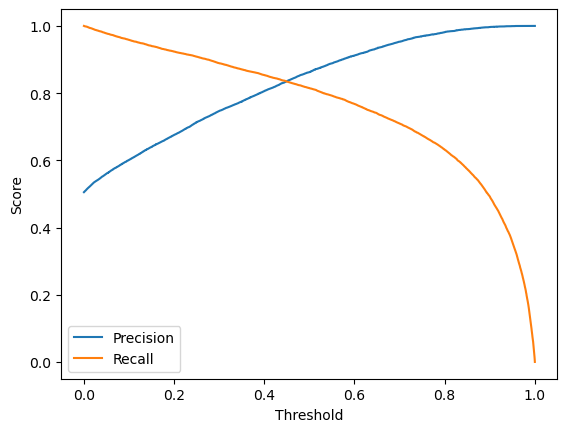

In [103]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, logit.predict_proba(X_test)[:, 1])

import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
importance = rf.feature_importances_
sorted(zip(importance, X_train.columns), reverse=True)[:10]


[(0.1620641653893113, 'number_inpatient_log1p'),
 (0.055184216239143165, 'num_medications|numchange'),
 (0.05027263218414801, 'discharge_disposition_id_1'),
 (0.04695156341215895, 'change|num_medications'),
 (0.042938122962309457, 'num_procedures'),
 (0.03846529422549055, 'num_medications|num_lab_procedures'),
 (0.035527070136610966, 'time_in_hospital|num_lab_procedures'),
 (0.03457992119408984, 'insulin'),
 (0.033689831882128554, 'number_outpatient_log1p'),
 (0.031779959265584135, 'num_medications')]

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [106]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")
    print(f"{name}: {precision_score(y_test, preds):.4f}")
    print(f"{name}: {recall_score(y_test, preds):.4f}")


Random Forest: 0.9365
Random Forest: 0.9929
Random Forest: 0.8807
Gradient Boosting: 0.9114
Gradient Boosting: 0.9820
Gradient Boosting: 0.8401
